# DSCI 503 - Homework 05
### Symphony Hopkins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.random.uniform(low = 1, high = 10, size = (5,8))
Z = np.round(Z, 2)
print(Z)

[[4.75 7.48 1.   3.72 2.32 1.83 2.68 4.11]
 [4.57 5.85 4.77 7.17 2.84 8.9  1.25 7.03]
 [4.76 6.03 2.26 2.78 8.21 9.71 3.82 7.23]
 [8.89 9.05 1.77 1.35 2.53 8.9  1.89 4.79]
 [9.62 5.8  7.23 3.84 7.18 8.51 1.16 7.75]]


In [3]:
print(f'''
Row 3:    {Z[2,:]}
Column 6: {Z[:,5]}''')


Row 3:    [4.76 6.03 2.26 2.78 8.21 9.71 3.82 7.23]
Column 6: [1.83 8.9  9.71 8.9  8.51]


In [4]:
print(f'''
Row Sums:    {np.sum(Z, axis = 1)}
Column Sums: {np.sum(Z, axis = 0)}
Array Sum:   {np.sum(Z)}
''')


Row Sums:    [27.89 42.38 44.8  39.17 51.09]
Column Sums: [32.59 34.21 17.03 18.86 23.08 37.85 10.8  30.91]
Array Sum:   205.32999999999998



## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)

x1 = np.random.normal(loc = 50, scale = 10, size = 1000)
x2 = np.random.normal(loc = 20, scale = 5, size = 1000)
x3 = np.random.normal(loc = 100, scale = 30, size = 1000)
x4 = np.random.normal(loc = 10, scale = 2, size = 1000)

x1 = x1.reshape(1000,1)
x2 = x2.reshape(1000,1)
x3 = x3.reshape(1000,1)
x4 = x4.reshape(1000,1)

X = np.hstack((x1, x2, x3, x4))

X = np.round(X, 2)

print(X.shape)

(1000, 4)


In [6]:
print(X[0:6,:])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
X_col_mean = np.mean(X, axis = 0)
X_col_std = np.std(X, axis = 0)

print(f'''
Column means:               {np.round(X_col_mean, 2)}
Column standard deviations: {np.round(X_col_std, 2)}
''')



Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]



In [8]:
W = (X - X_col_mean) / X_col_std

W_col_mean = np.mean(W, axis = 0)
W_col_std = np.std(W, axis = 0)

print(f'''
Column means:               {np.round(W_col_mean, 2)}
Column standard deviations: {np.round(W_col_std, 2)}
''')


Column means:               [ 0. -0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]



## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_csv('auto_mpg.txt', sep="\t")
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
auto.mean(numeric_only = True)

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = auto[auto['region'] == regions[0]]
eur_auto = auto[auto['region'] == regions[1]]
usa_auto = auto[auto['region'] == regions[2]]

print(f'''
Number of cars manufactured in Asia:   {len(asia_auto)}
Number of cars manufactured in Europe: {len(eur_auto)}
Number of cars manufactured in USA:    {len(usa_auto)}
''')


Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249



In [14]:
asia_auto_array = asia_auto.mean(numeric_only = True)
eur_auto_array = eur_auto.mean(numeric_only = True)
usa_auto_array = usa_auto.mean(numeric_only = True)

asia_auto_means = asia_auto_array.to_numpy()
eur_auto_means = eur_auto_array.to_numpy()
usa_auto_means = usa_auto_array.to_numpy()
region_means = np.vstack((asia_auto_means, eur_auto_means, usa_auto_means))

mean_df = pd.DataFrame(region_means, index = regions, columns = ['mpg','cyl','wt'])
mean_df

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

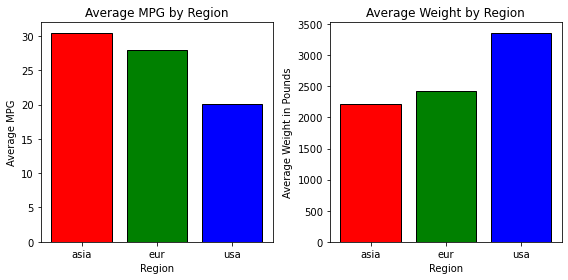

In [15]:
colors1 = ['red','green','blue']

mean_df['mpg']

plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
plt.bar(x = regions, height=mean_df['mpg'], edgecolor='black', color=colors1)
plt.title('Average MPG by Region')
plt.xlabel('Region')
plt.ylabel('Average MPG')

plt.subplot(1, 2, 2)
plt.bar(x = regions,height=mean_df['wt'], edgecolor='black',color=colors1)
plt.title('Average Weight by Region')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')

plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

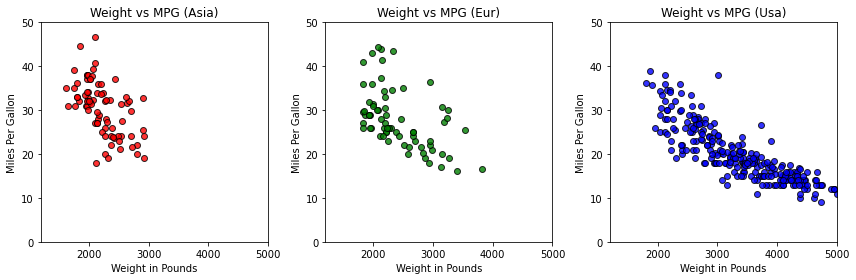

In [16]:
plt.figure(figsize=[12,4])
for index in range(len(regions)):
    
    plt.subplot(1, 3, index + 1)
    
    wt = (auto[auto['region'] == regions[index]]['wt']).to_numpy()
    mpg = (auto[auto['region'] == regions[index]]['mpg']).to_numpy()
    
    plt.scatter(wt, mpg, edgecolors = 'black', c = colors1[index], alpha = 0.8)
    
    plt.xlim([1200, 5000])
    plt.ylim([0, 50])
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Weight vs MPG ({regions[index].title()})')
    
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [17]:
cyl_values = auto['cyl'].unique()
print(cyl_values)

[4 6 8 5 3]


In [18]:
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


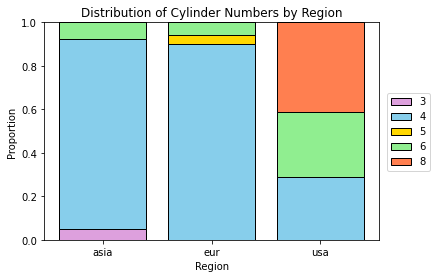

In [19]:
cyl_props_by_region = cyl_counts_by_region / np.sum(cyl_counts_by_region, axis = 0)

bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region

colors2 = ['plum', 'skyblue', 'gold', 'lightgreen', 'coral']

plt.figure(figsize = [6,4])

for index in range(len(cyl_values)):
    prop_row = cyl_props_by_region.iloc[index].to_numpy()
    bottom_row = bar_bottoms.iloc[index].to_numpy()
    
    plt.bar(regions, prop_row, bottom = bottom_row, edgecolor = 'black', color = colors2[index], label = cyl_props_by_region.index[index])
    
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(bbox_to_anchor=(1.01,0.7))
plt.show()